# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- загрузить данные;
- посмотреть и размер, и примеры данных;
- проверить количество пропусков в данных;
    - убедиться, что пропусков в данных нет и можно строить **baseline**;
- разделить данные на train и test;
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже;
- создать baseline модель, получить метрики на тестовой выборке;
- проанализировать данные, подготовить план по очистке и предобработке данных;
- создать функцию очистки;
- произвести очистку train и test выборок -> обучаем модель с очищенными данными;
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение;
- создать класс предобработки данных;
- сделать предобработку очищенных данных -> обучаем модель;
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение;

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- по признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю;
- сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые;
- оставить только признаки с высокой корреляцией с целевой переменной;
- посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих;
- посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум;
- комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет.

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!


- CRIM - уровень преступности на душу населения по городам
- ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв. футов.
- INDUS - доля акров нетоварного бизнеса в городе
- CHAS - переменная-флаг приближенности к реке (= 1 если рядом с рекой; 0 в ином случае)
- NOX - концентрация оксидов азота (частей на 10 миллионов)
- RM - среднее количество комнат в одном жилом помещении
- AGE - доля квартир, занятых владельцами, построенных до 1940 года
- DIS - взвешенные расстояния до пяти бостонских центров занятости
- RAD - индекс доступности радиальных магистралей
- TAX - недвижимость с полной стоимостью-ставка налога за 10 000 долларов США
- PTRATIO - соотношение числа учащихся и учителей по городам
- B - 1000(Bk - 0.63)^2, где Bk - доля чернокожего населения по городам
- LSTAT - процент бедности населения
- MEDV - средняя стоимость домов, занятых владельцами, в 1000 долларов США


In [21]:
# Зафиксируем состояние случайных чисел для воспроизводимости
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns


# Задание случайного сидирования
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [5]:
# Загрузка данных о ценах на дома в Бостоне
df_src = pd.read_csv('boston.csv')



# Просмотр информации о наборе данных
print(df_src.info())
print(df_src.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729 

In [9]:
# Проверка на пропуски в данных
missing_values = df_src.isnull().sum()
print("Количество пропущенных значений:\n", missing_values)


Количество пропущенных значений:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
# Разделение данных на признаки и целевую переменную

from sklearn.model_selection import train_test_split

X = df_src.drop('MEDV', axis=1)
y = df_src['MEDV']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
print(f"Размер тренировочной выборки: {X_train.shape}, Размер тестовой выборки: {X_test.shape}")


Размер тренировочной выборки: (404, 13), Размер тестовой выборки: (102, 13)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание и обучение базовой линейной модели
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_baseline = baseline_model.predict(X_test)

# Оценка метрик для базовой модели
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print("Метрики базовой модели:")
print(f"Mean Squared Error (MSE): {mse_baseline}")
print(f"Mean Absolute Error (MAE): {mae_baseline}")
print(f"R^2 Score: {r2_baseline}")


Метрики базовой модели:
Mean Squared Error (MSE): 24.29111947497374
Mean Absolute Error (MAE): 3.189091965887874
R^2 Score: 0.6687594935356289


In [66]:


# Пример удаления некоррелирующих признаков после анализа корреляций
# (подставьте сюда признаки, которые вы обнаружили как некоррелирующие)
X_train_cleaned = X_train.drop(['B'], axis=1)
X_test_cleaned = X_test.drop(['B'], axis=1)


In [67]:
# Повторное обучение модели после очистки данных
model_after_cleaning = LinearRegression()
model_after_cleaning.fit(X_train_cleaned, y_train)

# Предсказания и метрики для модели с очищенными данными
y_pred_cleaned = model_after_cleaning.predict(X_test_cleaned)
mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
mae_cleaned = mean_absolute_error(y_test, y_pred_cleaned)
r2_cleaned = r2_score(y_test, y_pred_cleaned)

print("Метрики модели после очистки данных:")
print(f"Mean Squared Error (MSE): {mse_cleaned}")
print(f"Mean Absolute Error (MAE): {mae_cleaned}")
print(f"R^2 Score: {r2_cleaned}")


Метрики модели после очистки данных:
Mean Squared Error (MSE): 22.777708563866028
Mean Absolute Error (MAE): 3.111377388238179
R^2 Score: 0.6893967884614762


Метрики модели после предобработки данных:
Mean Squared Error (MSE): 22.777708563866028
Mean Absolute Error (MAE): 3.111377388238179
R^2 Score: 0.6893967884614762


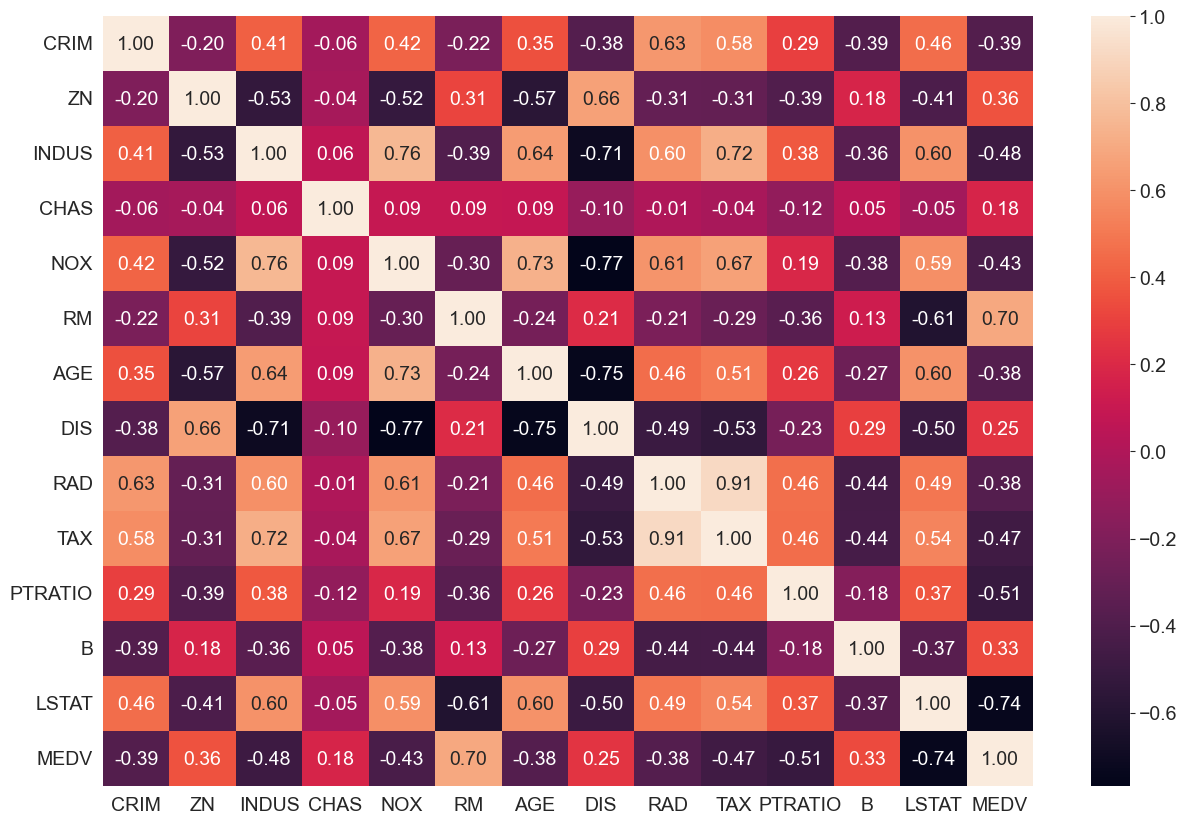

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

# Создание класса для предобработки данных
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Здесь можно добавить любые этапы обучения, например, нахождение средних или стандартных отклонений
        return self

    def transform(self, X):
        # Пример преобразования: добавление признака is_CRIM
        X_transformed = X.copy()
        X_transformed['is_CRIM'] = X_transformed['CRIM'].apply(lambda x: 1 if x != 0 else 0)
        # Удаление признаков с низкой корреляцией
        X_transformed = X_transformed.drop(['B'], axis=1)
        return X_transformed

# Применение предобработки к данным и повторное обучение модели
preprocessor = DataPreprocessor()
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Обучение модели после предобработки данных
model_after_preprocessing = LinearRegression()
model_after_preprocessing.fit(X_train_processed, y_train)

# Предсказания и оценка модели после предобработки
y_pred_processed = model_after_preprocessing.predict(X_test_processed)
mse_processed = mean_squared_error(y_test, y_pred_processed)
mae_processed = mean_absolute_error(y_test, y_pred_processed)
r2_processed = r2_score(y_test, y_pred_processed)

print("Метрики модели после предобработки данных:")
print(f"Mean Squared Error (MSE): {mse_processed}")
print(f"Mean Absolute Error (MAE): {mae_processed}")
print(f"R^2 Score: {r2_processed}")
correlation_mtrx = df_src.corr()
correlation_mtrx
sns.heatmap(correlation_mtrx, annot=True, fmt=".2f")
plt.show()

In [30]:
from sklearn.linear_model import LassoCV

# Использование LassoCV для поиска оптимального альфа
lasso_cv_model = LassoCV(alphas=np.logspace(-3, 1, 50), cv=5, random_state=RANDOM_SEED)
lasso_cv_model.fit(X_train_processed, y_train)

# Получение оптимального значения альфа
optimal_alpha = lasso_cv_model.alpha_
print(f"Оптимальное значение альфа: {optimal_alpha}")

# Оценка модели с оптимальным альфа на тестовых данных
y_pred_lasso_cv = lasso_cv_model.predict(X_test_processed)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)

print("Метрики Lasso модели с оптимальным альфа:")
print(f"Mean Squared Error (MSE): {mse_lasso_cv}")
print(f"Mean Absolute Error (MAE): {mae_lasso_cv}")
print(f"R^2 Score: {r2_lasso_cv}")


Оптимальное значение альфа: 0.001
Метрики Lasso модели с оптимальным альфа:
Mean Squared Error (MSE): 22.775416889109728
Mean Absolute Error (MAE): 3.1084345303658285
R^2 Score: 0.6894280383801021


In [63]:
# Построение корреляционной матрицы
correlation_matrix = df_src.corr()

# Сортировка признаков по корреляции с целевой переменной PRICE
correlation_with_target = correlation_matrix['TAX'].sort_values(ascending=False)
print("Корреляция признаков с ценой (PRICE):\n", correlation_with_target)

# Определение высоко- и низкокоррелирующих признаков
# Изменение порогов для определения высоко- и низкокоррелирующих признаков
high_corr_features = correlation_with_target[correlation_with_target > 0.2].index.tolist()
low_corr_features = correlation_with_target[correlation_with_target < 0.05].index.tolist()



print("Высококоррелирующие признаки:\n", high_corr_features)
print("Низкокоррелирующие признаки:\n", low_corr_features)
# Исключение целевой переменной из списка высококоррелирующих признаков
high_corr_features = [feature for feature in high_corr_features if feature != 'TAX']  # или 'MEDV', если так называется целевая переменная

# Удаление низкокоррелирующих признаков из обучающей и тестовой выборки
X_train_corr_filtered = X_train[high_corr_features]
X_test_corr_filtered = X_test[high_corr_features]

# Отбор признаков со средней корреляцией
mid_corr_features = correlation_with_target[(correlation_with_target >= 0.05) & (correlation_with_target <= 0.2)].index.tolist()
selected_features = high_corr_features + mid_corr_features

# Обучение моделей с разными наборами признаков и оценка метрик
models = {}
for name, features in {
    "high_corr_only": high_corr_features,
    "high_and_mid_corr": selected_features,
}.items():
    # Отбор признаков
    X_train_filtered = X_train[features]
    X_test_filtered = X_test[features]

    # Обучение модели
    model = LinearRegression()
    model.fit(X_train_filtered, y_train)

    # Оценка метрик
    y_pred = model.predict(X_test_filtered)
    models[name] = {
        "mse": mean_squared_error(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred),
        "r2": r2_score(y_test, y_pred),
    }

# Вывод метрик для каждой модели
for name, metrics in models.items():
    print(f"Модель: {name}")
    print(f"MSE: {metrics['mse']}, MAE: {metrics['mae']}, R^2: {metrics['r2']}\n")


Корреляция признаков с ценой (PRICE):
 TAX        1.000000
RAD        0.910228
INDUS      0.720760
NOX        0.668023
CRIM       0.582764
LSTAT      0.543993
AGE        0.506456
PTRATIO    0.460853
CHAS      -0.035587
RM        -0.292048
ZN        -0.314563
B         -0.441808
MEDV      -0.468536
DIS       -0.534432
Name: TAX, dtype: float64
Высококоррелирующие признаки:
 ['TAX', 'RAD', 'INDUS', 'NOX', 'CRIM', 'LSTAT', 'AGE', 'PTRATIO']
Низкокоррелирующие признаки:
 ['CHAS', 'RM', 'ZN', 'B', 'MEDV', 'DIS']
Модель: high_corr_only
MSE: 26.418285844564792, MAE: 3.546320450499411, R^2: 0.6397528573316762

Модель: high_and_mid_corr
MSE: 26.418285844564792, MAE: 3.546320450499411, R^2: 0.6397528573316762



In [ ]:
# Повторное обучение модели на данных после фильтрации признаков
model_corr_filtered = LinearRegression()
model_corr_filtered.fit(X_train_corr_filtered, y_train)

# Предсказания и метрики для модели с фильтрованными признаками
y_pred_corr_filtered = model_corr_filtered.predict(X_test_corr_filtered)
mse_corr_filtered = mean_squared_error(y_test, y_pred_corr_filtered)
mae_corr_filtered = mean_absolute_error(y_test, y_pred_corr_filtered)
r2_corr_filtered = r2_score(y_test, y_pred_corr_filtered)

print("Метрики модели после фильтрации признаков по корреляции:")
print(f"Mean Squared Error (MSE): {mse_corr_filtered}")
print(f"Mean Absolute Error (MAE): {mae_corr_filtered}")
print(f"R^2 Score: {r2_corr_filtered}")



Метрики модели после фильтрации признаков по корреляции:
Mean Squared Error (MSE): 26.418285844564792
Mean Absolute Error (MAE): 3.546320450499411
R^2 Score: 0.6397528573316762
Модель: high_corr_only
MSE: 26.418285844564792, MAE: 3.546320450499411, R^2: 0.6397528573316762

Модель: high_and_mid_corr
MSE: 26.418285844564792, MAE: 3.546320450499411, R^2: 0.6397528573316762



<Figure size 1500x1500 with 0 Axes>

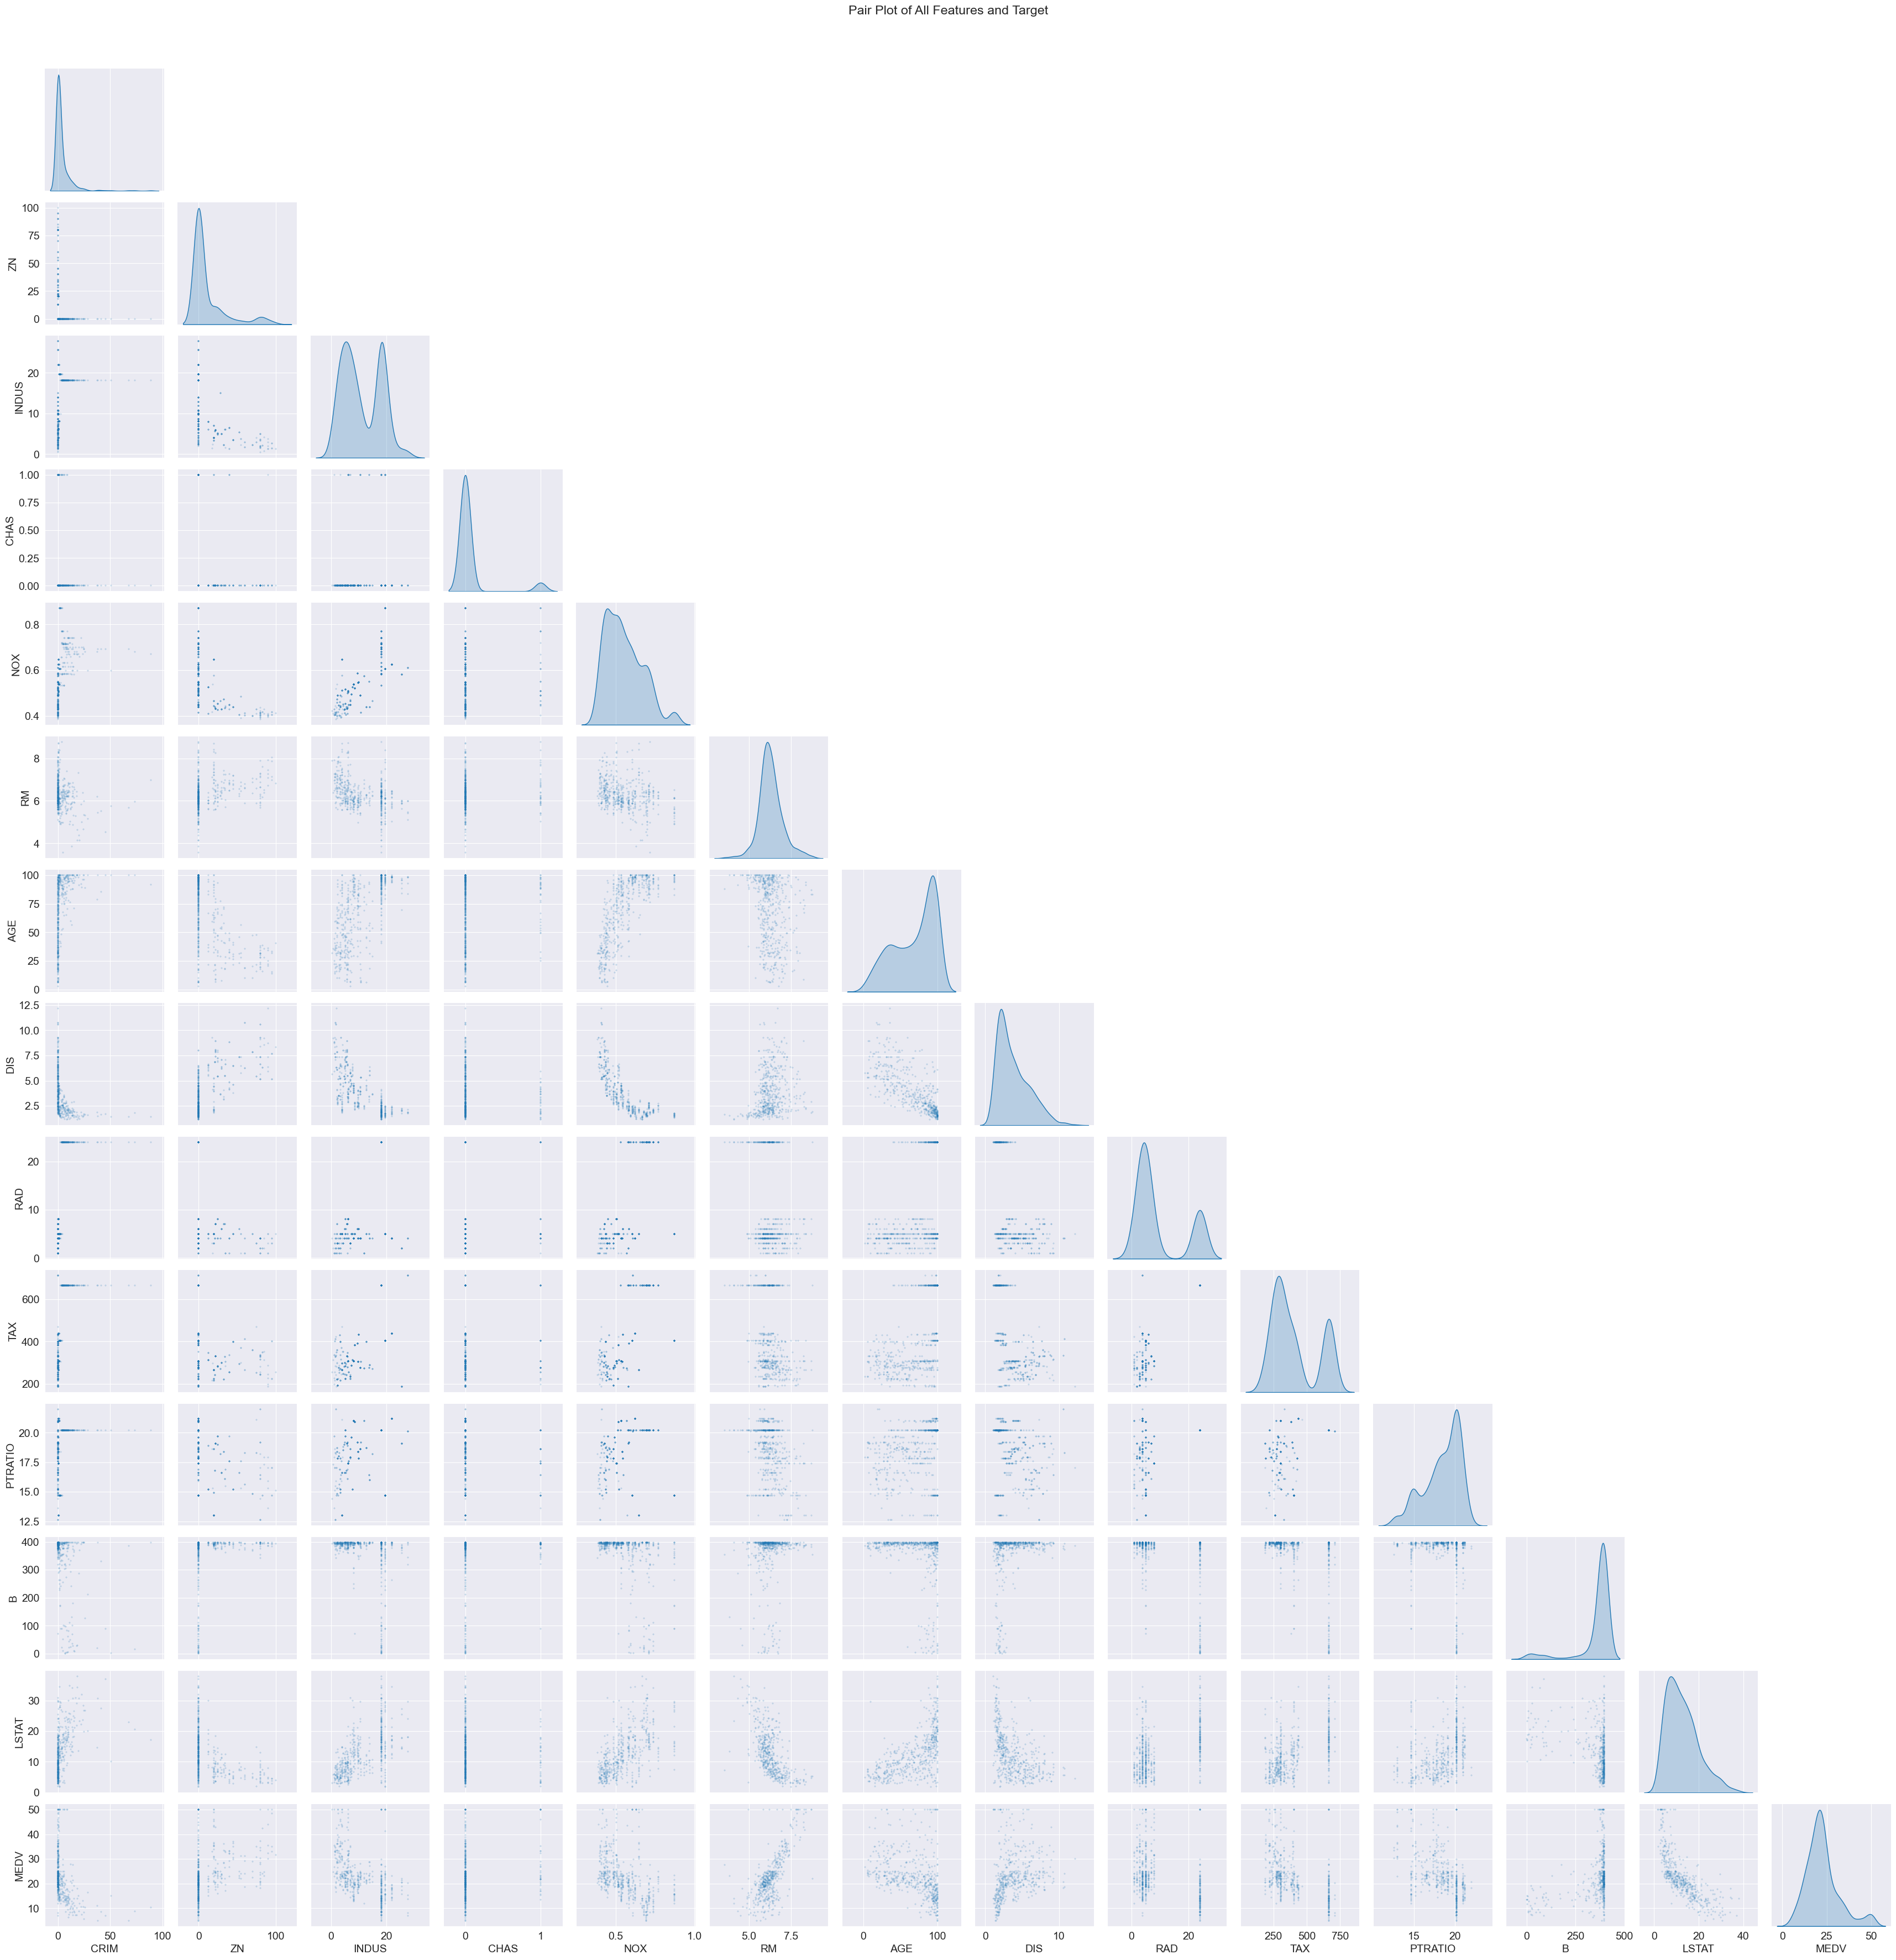

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Параметры для отображения (по умолчанию диаграммы рассеяния для всех переменных)
plt.figure(figsize=(15, 15))
sns.pairplot(df_src, diag_kind="kde", markers="+", corner=True, plot_kws={'alpha':0.6, 's':10})
plt.suptitle("Pair Plot of All Features and Target", y=1.02)
plt.show()


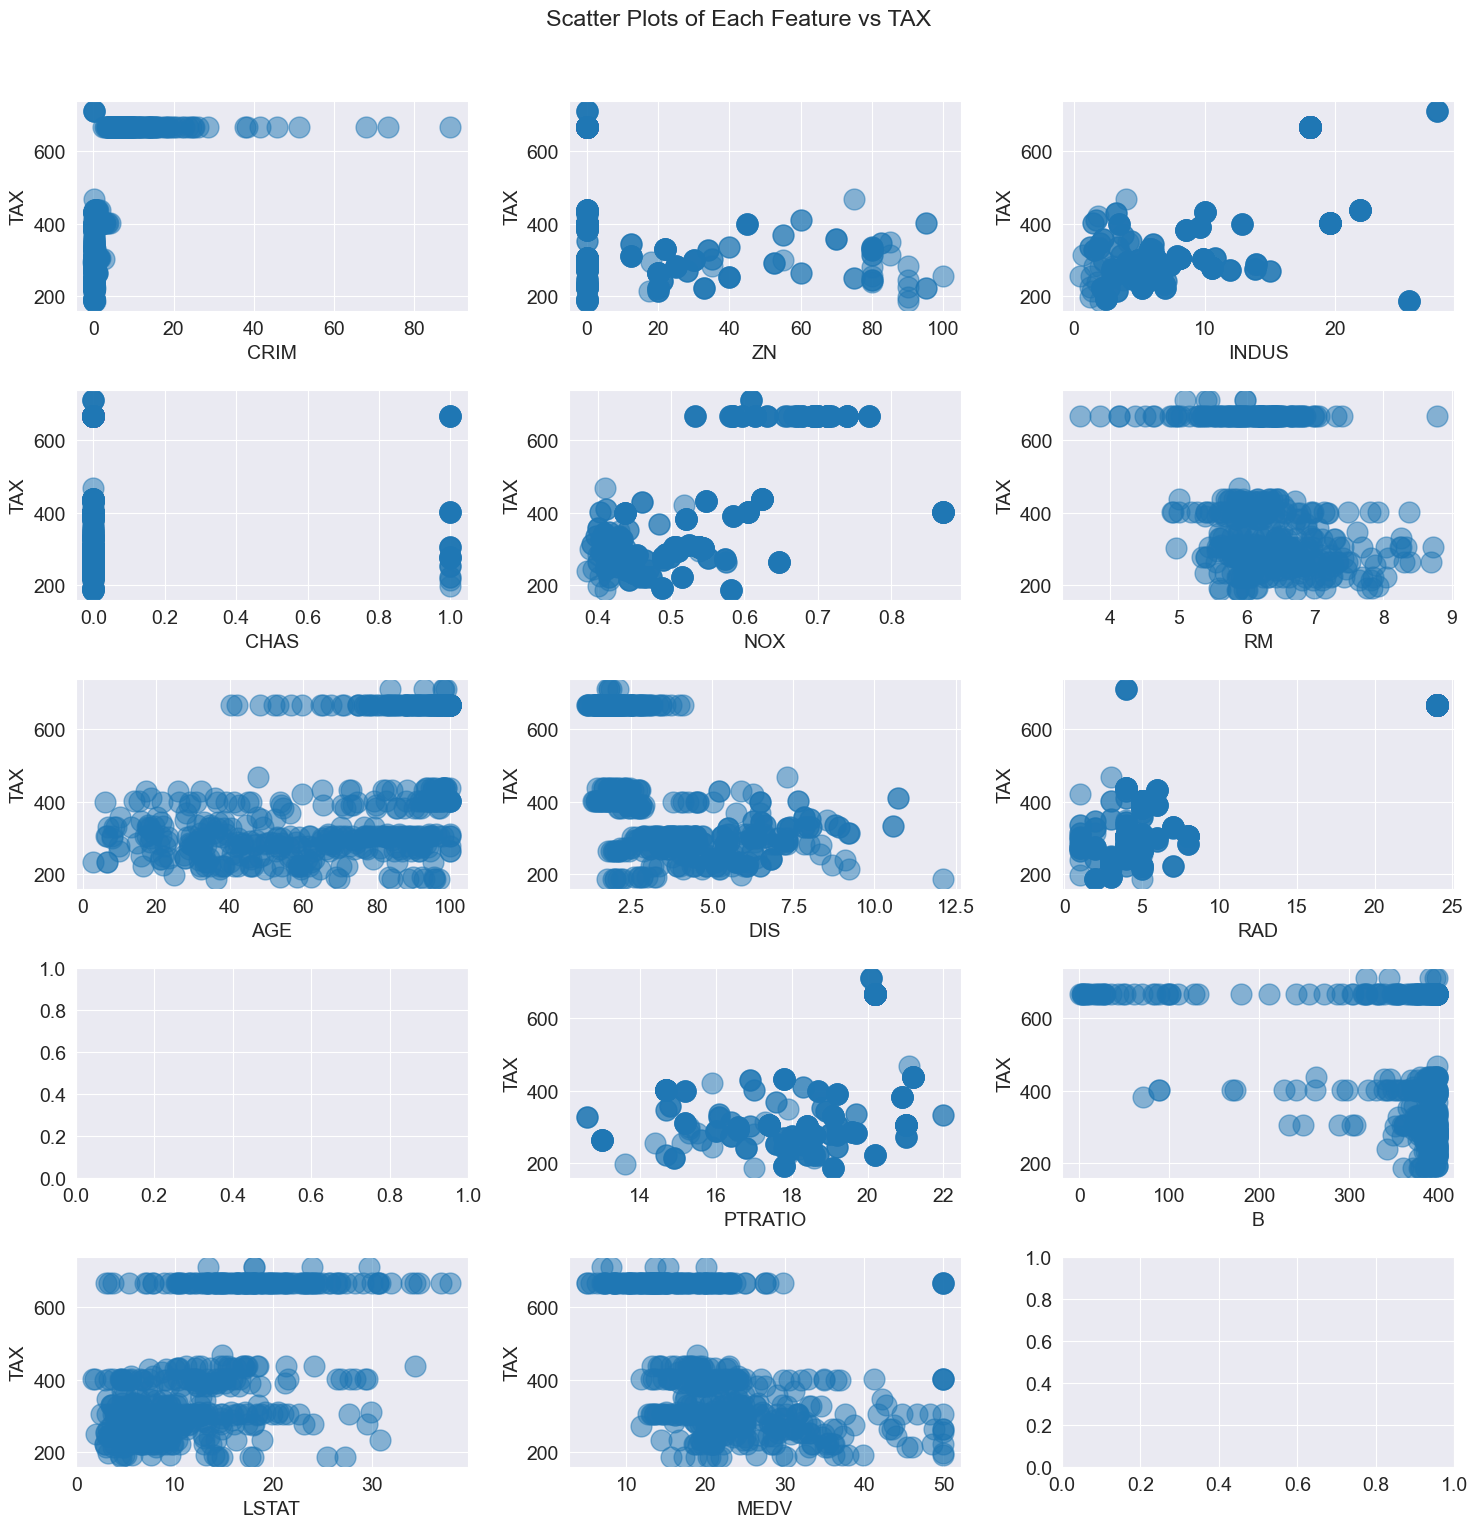

In [65]:
import matplotlib.pyplot as plt

# Задаем размер сетки графиков
num_features = df_src.shape[1] - 1  # исключаем целевую переменную
fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=(15, 15))
fig.suptitle('Scatter Plots of Each Feature vs TAX', y=1.02)

# Построение диаграммы рассеяния для каждого признака по отношению к TAX
for idx, feature in enumerate(df_src.columns):
    if feature == 'TAX':
        continue  # Пропускаем целевую переменную, так как она уже используется как Y
    row, col = divmod(idx, 3)
    axes[row, col].scatter(df_src[feature], df_src['TAX'], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('TAX')

plt.tight_layout()
plt.show()


Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты с вашими мыслями и результатами улучшения модели.

Успехов вам, мы в вас верим, вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>